Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

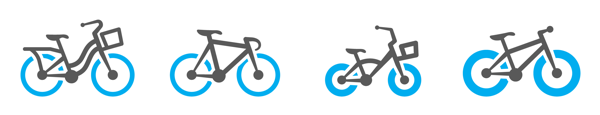

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # used to split data between train and test

In [44]:
import warnings
warnings.filterwarnings('ignore')

test = pd.read_csv("./Data/test.csv")

In [45]:
train = pd.read_csv("./Data/train.csv")

In [46]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [47]:
train.shape

(10886, 12)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Data Preparation and Exploratory Data Analysis

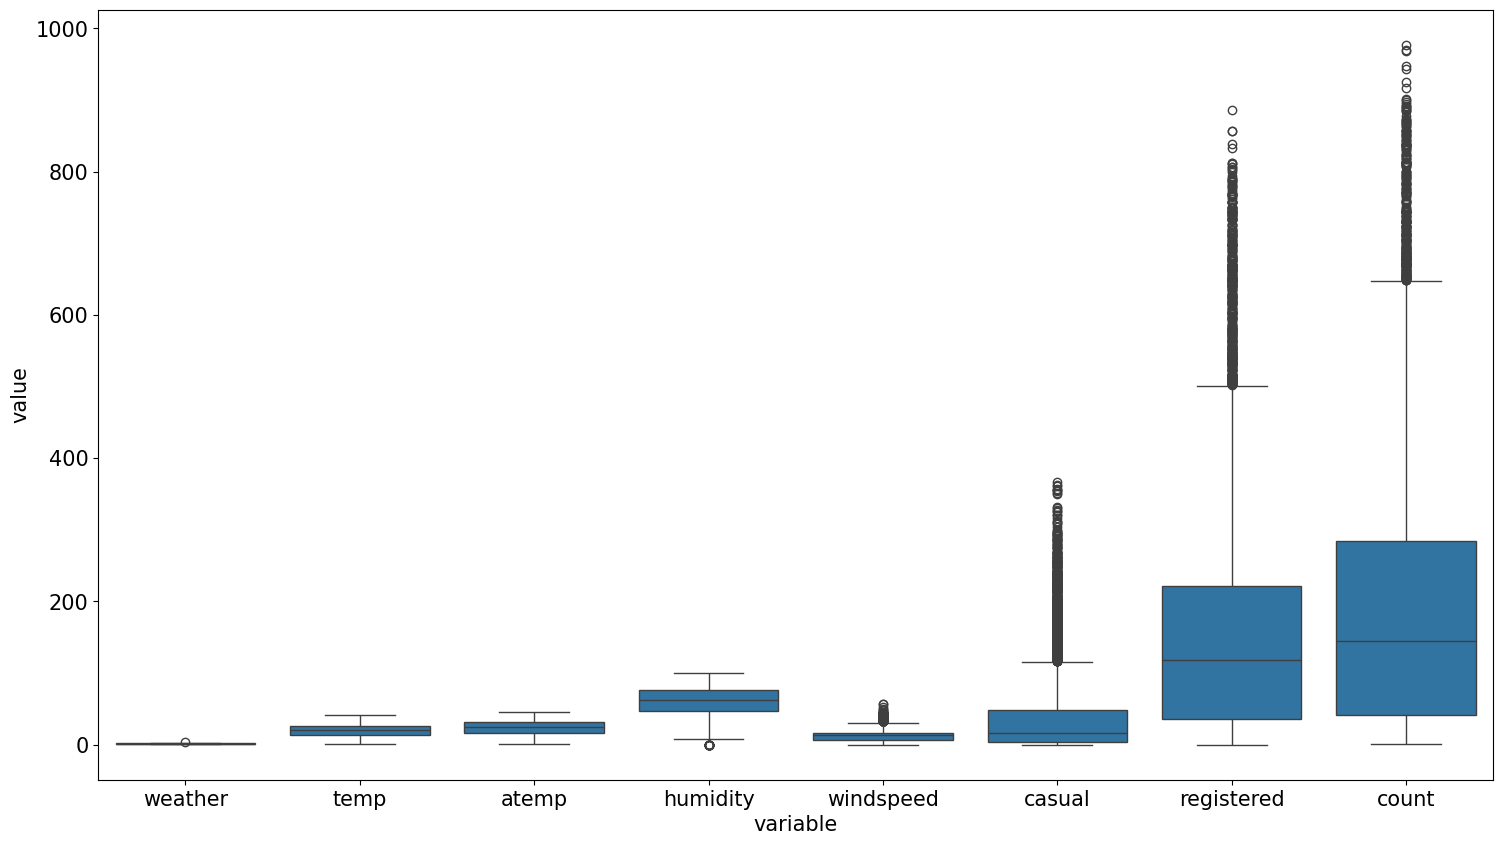

In [49]:
# subset data to show key numeric features
data = train[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
# create a figure to plot our visual
fig, ax = plt.subplots(figsize=(18, 10))
# plot the boxplots to show the feature distributions and outliers
sns.boxplot(x="variable", y="value", data=pd.melt(data));

Feature Engineering

Extract new features from datetime feature
------------------------------------------

From the datetime feature, there are 4 new potentially useful features we can create:

-   year
-   month
-   day
-   hour
-   day of the week
-   weekday or weekend

In [50]:
train['datetime']=pd.to_datetime(train['datetime'])

In [51]:
train['year'] = train['datetime'].dt.year # Make year feature
train['month'] = train['datetime'].dt.month # Make month feature
train['day'] = train['datetime'].dt.day # Make day feature
train['hour'] = train['datetime'].dt.hour # Make hour feature

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

In [53]:
Q1 = train.quantile(0.15)
Q3 = train.quantile(0.85)
IQR = Q3 - Q1
IQR

datetime      513 days 22:30:00
season                      3.0
holiday                     0.0
workingday                  1.0
weather                     1.0
temp                      17.22
atemp                      19.7
humidity                   43.0
windspeed               13.9963
casual                     72.0
registered                281.0
count                     362.0
year                        1.0
month                       9.0
day                        14.0
hour                       17.0
dtype: object

Handle outliers

In [54]:
train_no_outliers = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_no_outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [55]:
len(train) - len(train_no_outliers)

734

In [56]:
# train['year'].value_counts()

<Axes: ylabel='Frequency'>

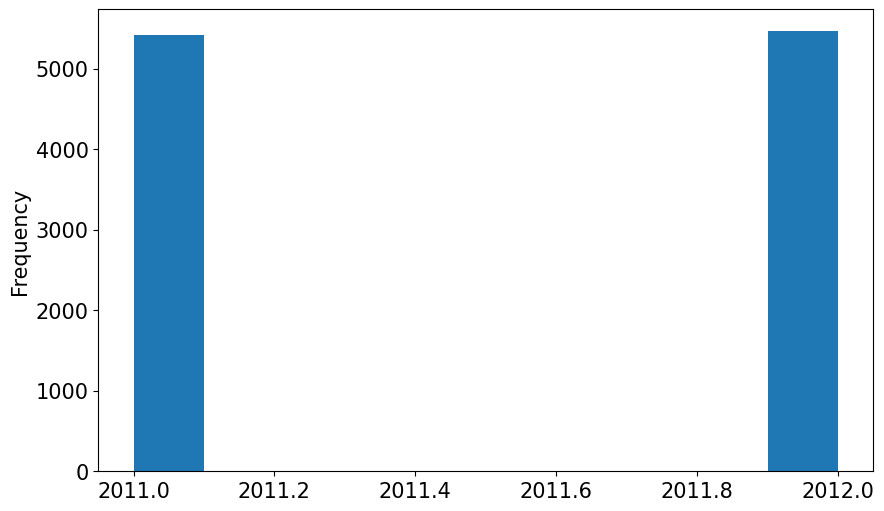

In [57]:
train['year'].plot(kind='hist',y='count', figsize=(10,6))

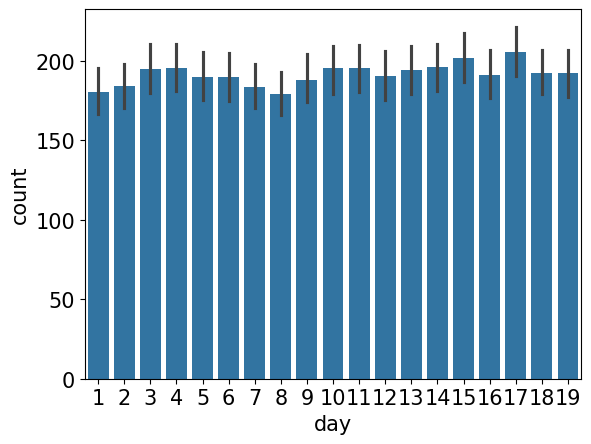

In [58]:
# train['day'].plot(kind='hist' , figsize=(10,6))

sns.barplot(x='day', y='count', data=train)
plt.show()

In [59]:
train['day'].value_counts()

day
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

Extract Day name and weekday or weekend  feature

In [60]:
train['day_of_week'] = train['datetime'].dt.day_name()

In [61]:
train['is_weekend'] = train['datetime'].dt.weekday.map(lambda x: 'Weekend' if x >=5 else 'Weekday')

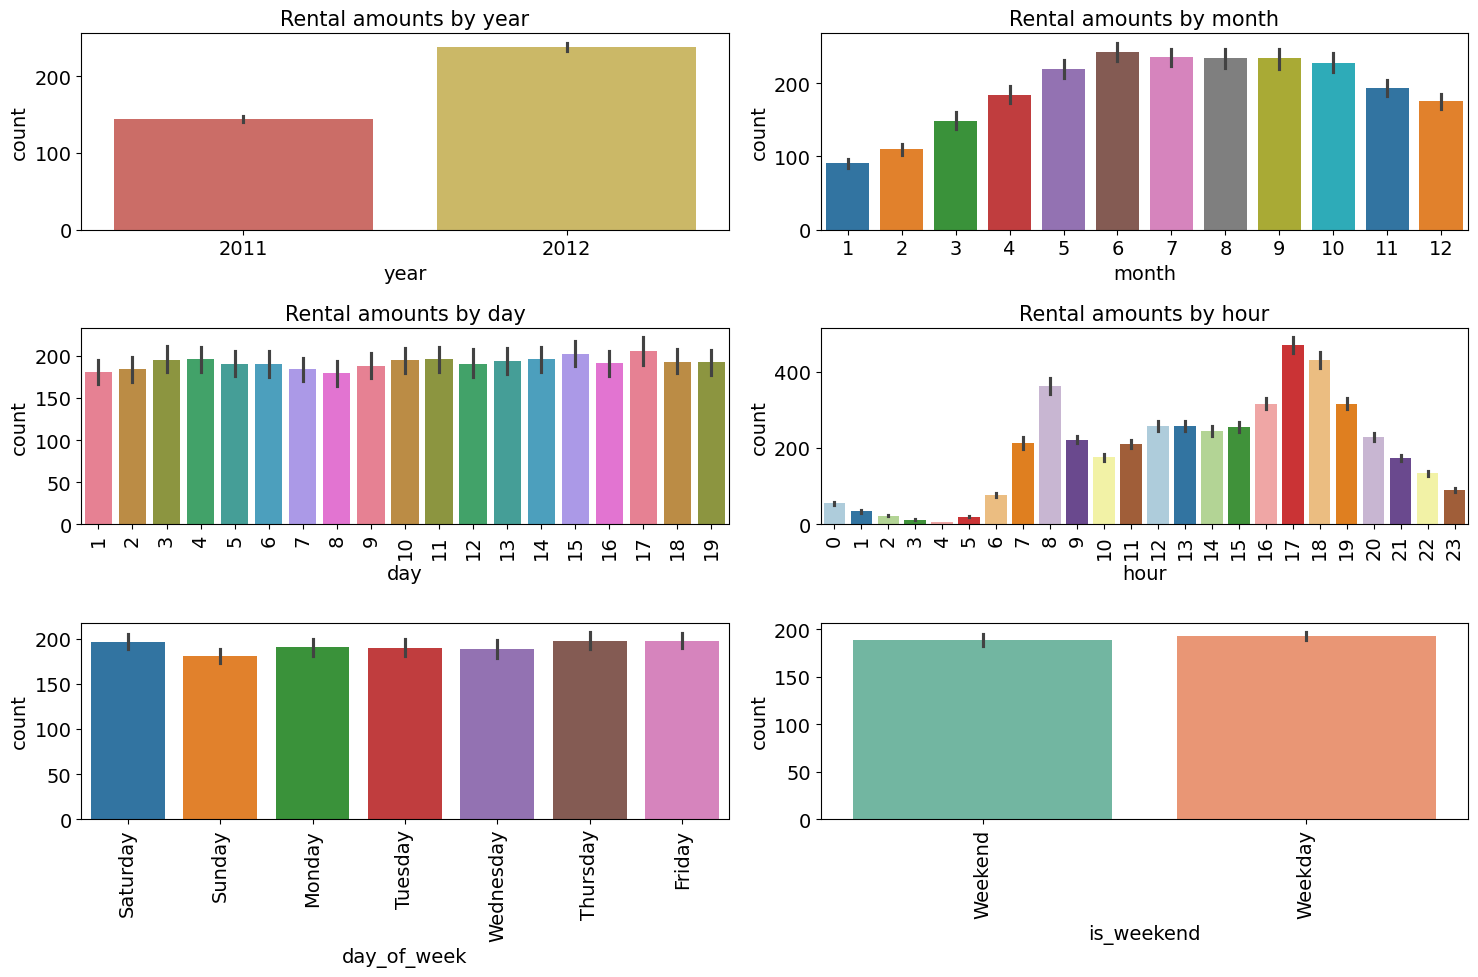

In [78]:
# Step 1 : Prepare m-rows x n-columns Figure
plt.rc('font', size=14)
plt.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2) # Make Figure in 3rows 2columns
# Padding between the graphs
figure.set_size_inches(15, 10) # Set total Figure size
sns.color_palette("tab10")
# Step 2 : Assign subplots
# Assign each axis an average rental counts barplot per year, month, day, and hour
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0],palette=sns.color_palette("hls", 8))
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1],palette=sns.color_palette("tab10"))
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0],palette=sns.color_palette("husl", 8))
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1],palette=sns.color_palette("Paired"))
sns.barplot(x='day_of_week', y='count', data=train, ax=axes[2, 0] ,palette=sns.color_palette("tab10"))
sns.barplot(x='is_weekend', y='count', data=train, ax=axes[2, 1],palette=sns.color_palette("Set2"))

# Step 3: Plot Annotations
# 3.1 Set subplots' title
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')


# 3.2 Rotate 90 degrees of the x-axis labels of the subplots in row 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)
axes[2, 0].tick_params(axis='x', labelrotation=90)
axes[2, 1].tick_params(axis='x', labelrotation=90);
plt.tight_layout()
plt.show() 

In [79]:
print('Average Bike Usage Count:')
print()
print(train.groupby(by='day_of_week')['count'].mean())
print()
print(train.groupby(by='is_weekend')['count'].mean())

Average Bike Usage Count:

day_of_week
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

is_weekend
Weekday    192.724589
Weekend    188.765096
Name: count, dtype: float64


From this we can see the following insights:

-   Average Bike demand has grown in 2012 compared to 2011
-   Average Bike demand is more in the summer months
-   Average Bike demand is more in the mornings and evenings (probably during rush hour)
-   Average Bike demand is similar on weekdays and weekends
-   Average Bike demand is the highest on Fridays

Change season and weather features from numbers to categories
-------------------------------------------------------------

In [63]:
train['season'] = train['season'].map({1:  'Spring',
                                       2 : 'Summer',
                                       3 : 'Fall',
                                       4 : 'Winter' })

train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Clouds',
                                         3: 'Light Snow, Rain, Thunder',
                                         4: 'Heavy Snow, Rain, Thunder'})
train_no_outliers['season'] = train_no_outliers['season'].map({1:  'Spring',
                                                               2 : 'Summer',
                                                               3 : 'Fall',
                                                               4 : 'Winter' })

train_no_outliers['weather'] = train_no_outliers['weather'].map({1: 'Clear',
                                                                 2: 'Mist, Clouds',
                                                                 3: 'Light Snow, Rain, Thunder',
                                                                 4: 'Heavy Snow, Rain, Thunder'})

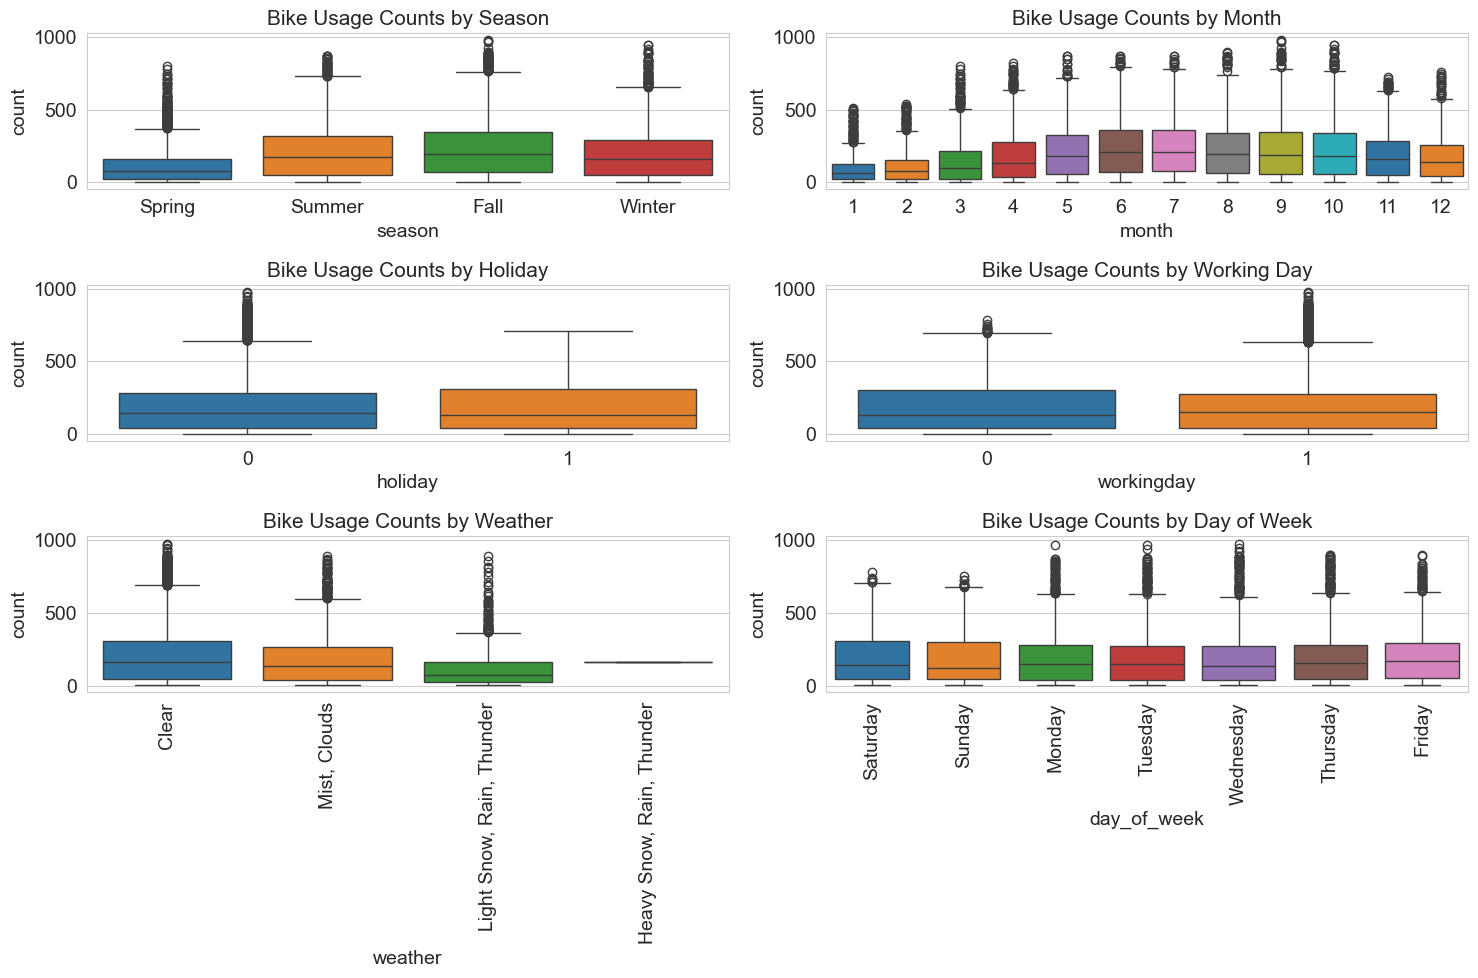

In [86]:
# Step 1 : Prepare m-rows x n-columns Figure
figure, axes = plt.subplots(nrows=3, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(15, 10)
sns.color_palette("tab10")
# Step 2 : Assign subplots
# Boxplot of rental counts per season, month, holiday, workingday, weather & day of week
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0], palette=sns.color_palette("tab10"))
sns.boxplot(x='month', y='count', data=train, ax=axes[0, 1], palette=sns.color_palette("tab10"))
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0], palette=sns.color_palette("tab10"))
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1], palette=sns.color_palette("tab10"))
sns.boxplot(x='weather', y='count', data=train, ax=axes[2, 0], palette=sns.color_palette("tab10"))
sns.boxplot(x='day_of_week', y='count', data=train, ax=axes[2, 1], palette=sns.color_palette("tab10"))

# Step 3: Plot Annotations
# 3.1 Set subplots' title
axes[0, 0].set(title='Bike Usage Counts by Season')
axes[0, 1].set(title='Bike Usage Counts by Month')
axes[1, 0].set(title='Bike Usage Counts by Holiday')
axes[1, 1].set(title='Bike Usage Counts by Working Day')
axes[2, 0].set(title='Bike Usage Counts by Weather')
axes[2, 1].set(title='Bike Usage Counts by Day of Week')

# 3.2 Fix x-axis labels overlap
axes[2, 0].tick_params('x', labelrotation=90) # rotate 10 degrees
axes[2, 1].tick_params('x', labelrotation=90) # rotate 10 degrees
plt.tight_layout();

Visualizing average bike rental counts per year, month, day, hour, day of week & weekday
----------------------------------------------------------------------------------------

-   Step 1 : Prepare m-rows x n-columns Figure
-   Step 2 : Assign subplots (each axis an average rental counts barplot per year, month, day, and hour)
-   Step 3 : Plot Annotations (title, rotations)

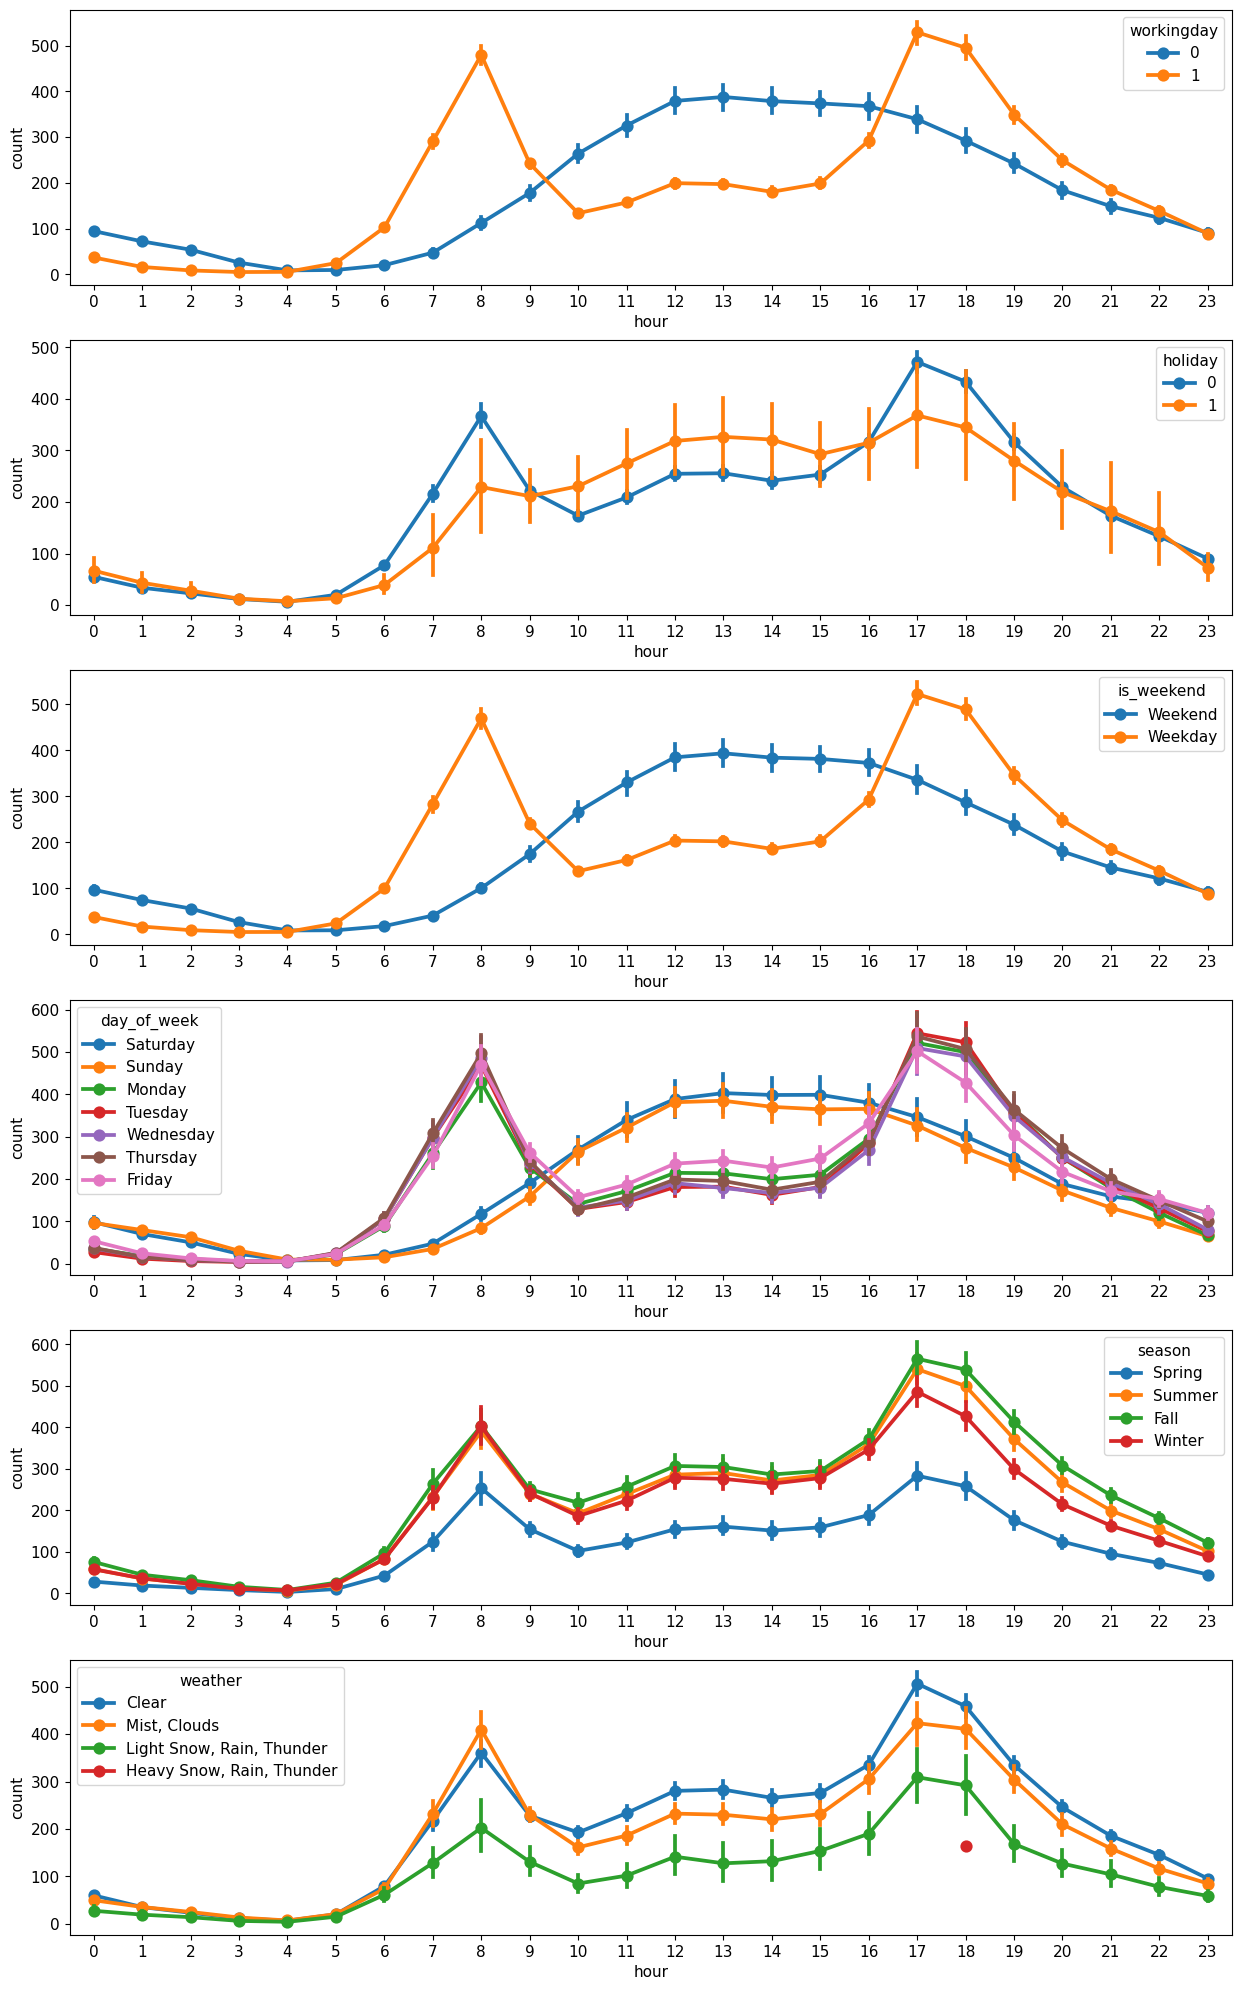

In [64]:
# Step 1 : Prepare m rows n columns Figure
plt.rc('font', size=11)
figure, axes = plt.subplots(nrows=6)
figure.set_size_inches(15, 25)

# Step 2 : Assign subplot
# Pointplot of the average rental counts per hours by workingday, holiday, weekday, season, weather
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='is_weekend', ax=axes[2]);
sns.pointplot(x='hour', y='count', data=train, hue='day_of_week', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[4])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[5]);

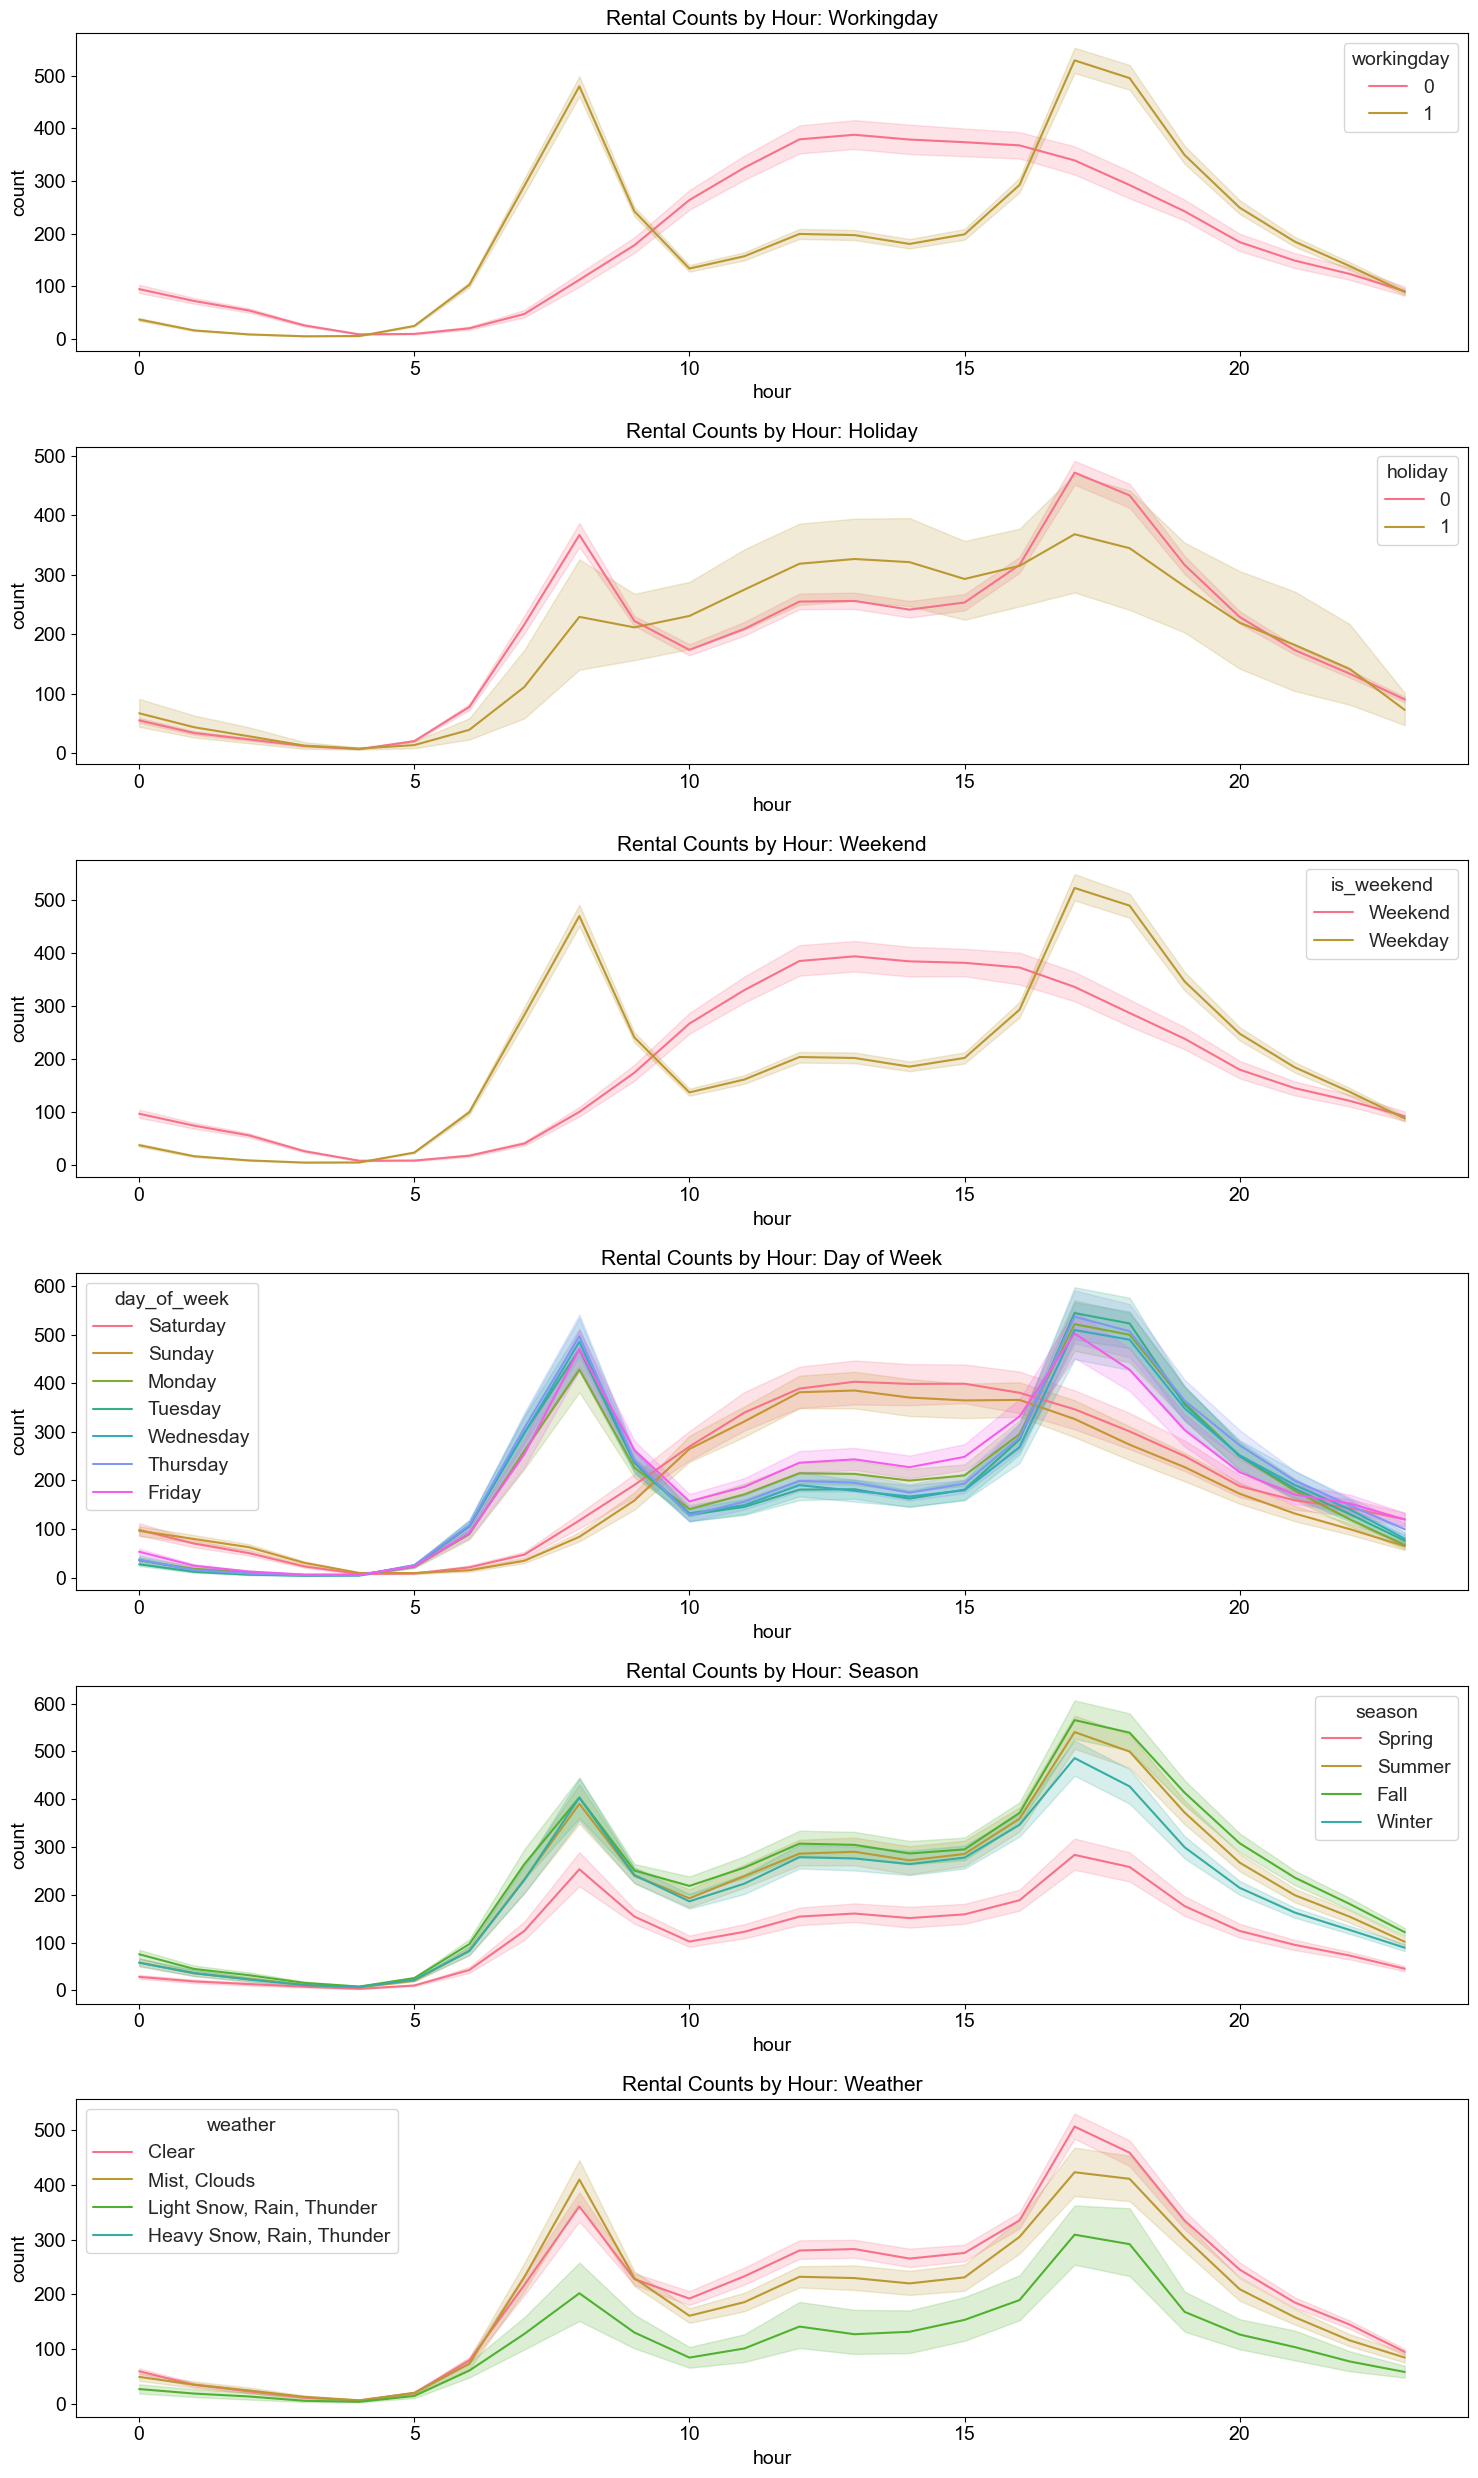

In [80]:
# import matplotlib.pyplot as plt

# # ... (Assuming you have your 'train' DataFrame)

# Create a figure with 6 subplots
fig, axes = plt.subplots(nrows=6, figsize=(15, 25))

# Define plot styles
sns.set_style("whitegrid")
sns.set_palette("husl")

# Plot 1: Workingday
sns.lineplot(x='hour', y='count', hue='workingday', data=train, ax=axes[0])
axes[0].set_title('Rental Counts by Hour: Workingday')

# Plot 2: Holiday
sns.lineplot(x='hour', y='count', hue='holiday', data=train, ax=axes[1])
axes[1].set_title('Rental Counts by Hour: Holiday')

# Plot 3: Weekend
sns.lineplot(x='hour', y='count', hue='is_weekend', data=train, ax=axes[2])
axes[2].set_title('Rental Counts by Hour: Weekend')

# Plot 4: Day of Week
sns.lineplot(x='hour', y='count', hue='day_of_week', data=train, ax=axes[3])
axes[3].set_title('Rental Counts by Hour: Day of Week')

# Plot 5: Season
sns.lineplot(x='hour', y='count', hue='season', data=train, ax=axes[4])
axes[4].set_title('Rental Counts by Hour: Season')

# Plot 6: Weather
sns.lineplot(x='hour', y='count', hue='weather', data=train, ax=axes[5])
axes[5].set_title('Rental Counts by Hour: Weather')

plt.tight_layout()
plt.show()

### 1\. **Working Day (Top Chart):**

-   **Working Days (1):** There is a clear spike in bike rentals around 8 AM and 5-6 PM, corresponding to commuting hours.
-   **Non-Working Days (0):** Rentals increase steadily during the day, peaking around 12 PM to 4 PM, likely due to leisure activities.

### 2\. **Holiday (Second Chart):**

-   **Non-Holidays (0):** Similar pattern to working days, with spikes in the morning and evening rush hours.
-   **Holidays (1):** Rentals peak during mid-day (10 AM to 4 PM), with fewer rentals during early morning and evening.

### 3\. **Weekend vs. Weekday (Third Chart):**

-   **Weekdays:** Peak hours mirror the working day pattern, with sharp increases during morning and evening commute times.
-   **Weekends:** Rentals remain steady throughout the day, with a gradual increase and a mid-day peak.

### 4\. **Day of the Week (Fourth Chart):**

-   Rentals on **weekdays (Monday-Friday)** are consistent, following the commuting patterns seen earlier.
-   **Saturday and Sunday:** Show higher rental activity during mid-day and reduced morning and evening spikes compared to weekdays.

### 5\. **Season (Fifth Chart):**

-   **Summer and Fall:** Show the highest rental counts throughout the day, indicating favorable weather conditions.
-   **Winter:** Exhibits lower overall activity, likely due to colder temperatures.
-   **Spring:** Shows moderate rental levels, with similar peaks to Fall.

### 6\. **Weather (Bottom Chart):**

-   **Clear Weather:** The highest rental counts across all hours, especially during peak times.
-   **Mist, Clouds:** Lower rental counts than clear weather, but still significant activity during commuting hours.
-   **Rain, Thunder (Light/Heavy):** Markedly lower rentals, indicating adverse weather conditions discourage bike usage.

### **Insights and Conclusions:**

-   Bike rentals are heavily influenced by time of day, particularly for commuting on working days and weekdays.
-   Leisure activities dominate rentals during holidays, weekends, and mid-day hours.
-   Seasonal effects show that rentals increase in favorable weather conditions (Summer and Fall).
-   Poor weather conditions (rain, snow, thunder) significantly reduce bike rentals.

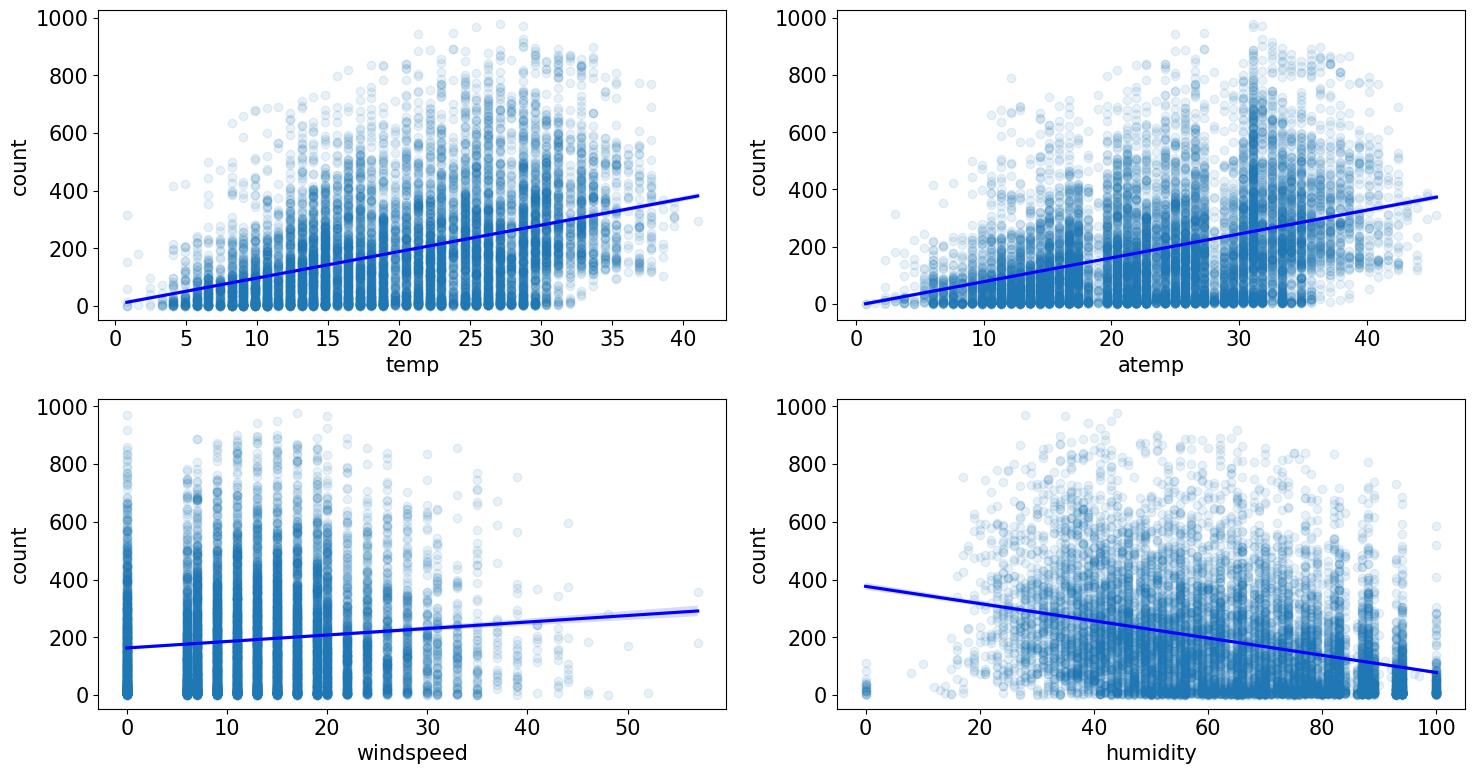

In [65]:
# Step 1 : Prepare m rows n columns Figure
plt.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(15, 8)

# Step 2 : Assign subplots
# Scatterplot of rental counts per temperature, sensible temperature, wind speed, and humidity
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
plt.tight_layout();

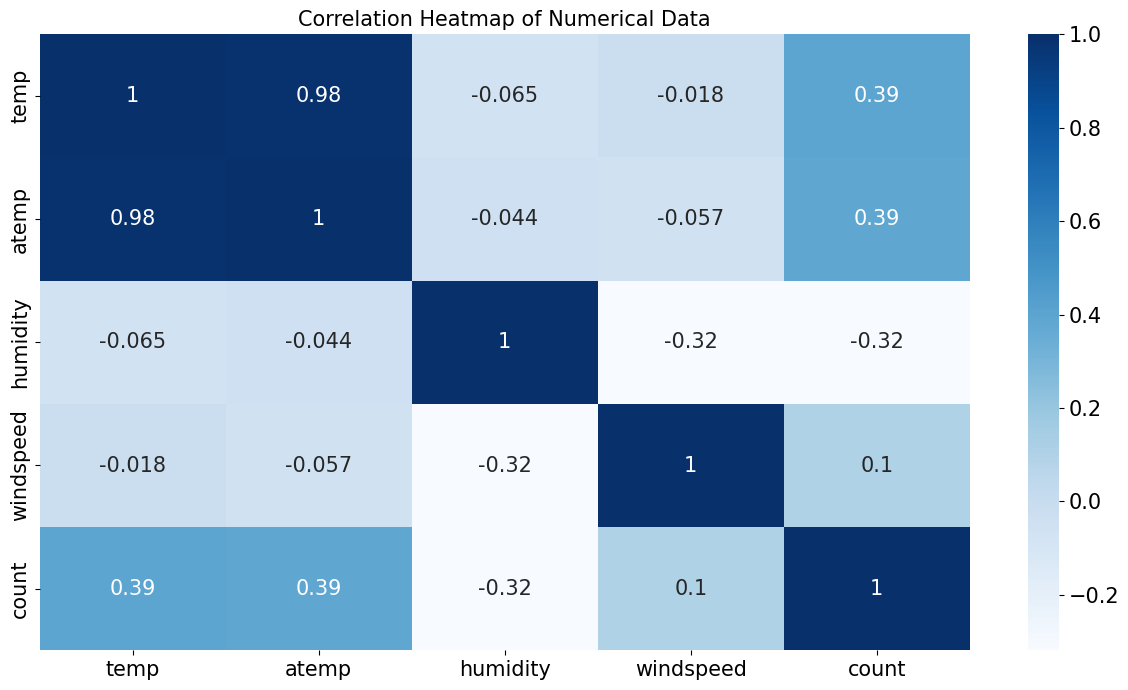

In [66]:
corr_mat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() # Inter-feature correlation matrix
fig, ax= plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(corr_mat, annot=True, cmap='Blues') # Plot heatmap
ax.set(title='Correlation Heatmap of Numerical Data');

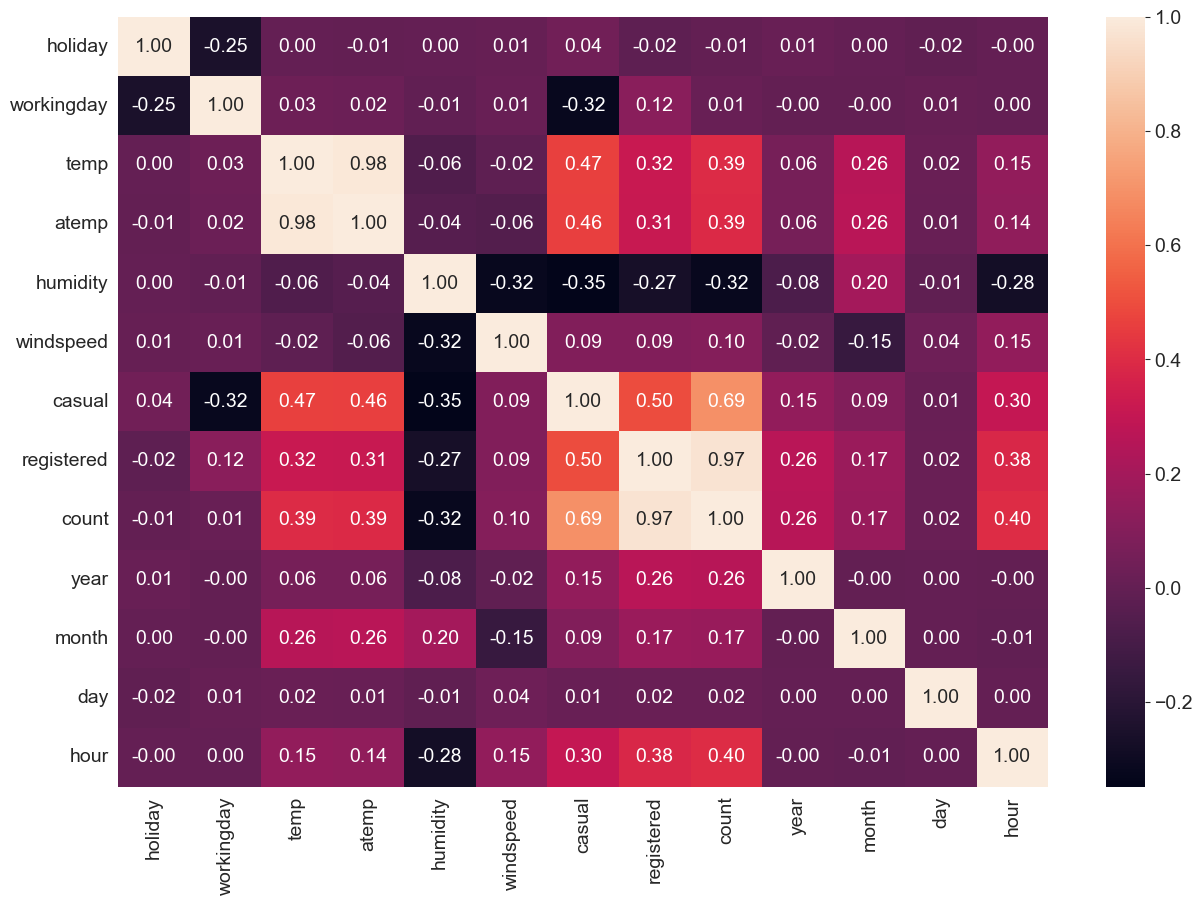

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(train.select_dtypes(include=['int', 'float']).corr(), annot=True, fmt='.2f')
plt.show()

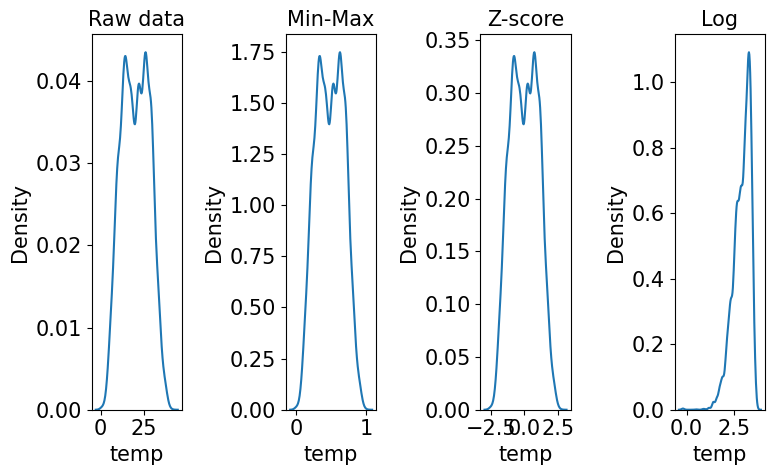

In [67]:
def LogScaling(x):
    return np.log(x)


def MinMaxScaling(x):
    return(x-np.min(x))/(np.max(x)-np.min(x))


def Standardize(x):
    return (x - np.mean(x)) / np.std(x)

c1 = MinMaxScaling(train['temp'])
c2 = Standardize(train['temp'])
c3 = LogScaling(train['temp'])


#############show the results of the scaling methods on the data##################
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8, 5))

sns.kdeplot(ax=ax1, x=train['temp']).set_title('Raw data')
sns.kdeplot(ax=ax2, x=c1).set_title('Min-Max')
sns.kdeplot(ax=ax3, x=c2).set_title('Z-score')
sns.kdeplot(ax=ax4, x=c3).set_title('Log')

plt.tight_layout()
plt.show()